#CP4

**Análise Exploratória - Locação de Imóveis no Brasil**

Nesta prova, você terá a oportunidade de realizar uma análise exploratória detalhada de um dataset que contém informações sobre locação de imóveis em diversas cidades do Brasil. Seu objetivo será explorar a estrutura dos dados, identificar padrões e, principalmente, remover possíveis outliers que possam afetar a integridade da análise.

Utilize técnicas de visualização, estatísticas descritivas e o conhecimento adquirido ao longo do curso para realizar essa análise e fornecer insights valiosos sobre o mercado imobiliário.

Boa sorte!

**Descrição Geral:** <br/>

O dataset casas_brasil.csv contém 10.692 registros e 13 colunas. Ele inclui informações sobre a cidade, tamanho do imóvel (área), número de quartos, banheiros, vagas de estacionamento, além de dados financeiros como o valor do aluguel, taxa de condomínio (HOA), imposto sobre a propriedade e seguro contra incêndios. A seguir estão as principais colunas e suas descrições:

- city: Cidade onde o imóvel está localizado.
- area: Tamanho do imóvel em metros quadrados.
- rooms: Número de quartos.
- bathroom: Número de banheiros.
- parking_spaces: Número de vagas de estacionamento.
- floor: Andar em que o imóvel está localizado.
- animal: Aceitação ou não de animais de estimação (ex.: "acept", "not acept").
- furniture: Informação sobre mobília do imóvel (ex.: "furnished", "not furnished").
- hoa: Valor da taxa de condomínio (em reais).
- rent_amount: Valor do aluguel (em reais).
- property_tax: Valor do imposto sobre a propriedade (em reais).
- fire_insurance: Valor do seguro contra incêndios (em reais).
- total: Valor total a ser pago, incluindo aluguel, condomínio, impostos e seguro.

## Análise de Estrutura - *(Peso: 3)*

1 - Faça o import do pandas

In [36]:
import pandas as pd
import plotly.express as px

2 - Crie um novo dataframe com o .csv casas_brasil.csv e apresente os 5 primeiros e em outro bloco de código os 5 últimos registros

In [2]:
casas_df = pd.read_csv('casas_brasil.csv')
casas_df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
casas_df.tail()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


3 - Existem variáveis faltantes? <br/>
***Responda aqui***

Resposta: Não.



In [11]:
casas_df.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking_spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent_amount       0
property_tax      0
fire_insurance    0
total             0
dtype: int64

4 - Cite exemplo de variáveis qualitativas (Rótulos ou de Classificação) em nosso dataset.
#### Resposta: city, animal, furniture

5 - Cite exemplo de variáveis quantitativas (Valores inteiros ou pontos flutuantes) em nosso dataset.
#### Resposta: area, rooms, bathroom, parking_spaces, floor, hoa, rent_amount, property_tax, fire_insurance, total

In [12]:
casas_df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


6 - Utilize uma função embutida do pandas para apresentar o número de casas que temos no dataframe para as top 5 cidades em quantidade?

In [17]:
top5 = casas_df['city'].value_counts().head(5)
top5

city
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64

7 - Aproveitando a função acima, apresente as top 5 cidades em porcentagem.

In [21]:
pd.options.display.float_format = '{0:.2f}'.format

porcentagem = top5 / top5.sum() * 100
porcentagem

city
São Paulo        55.06
Rio de Janeiro   14.04
Belo Horizonte   11.77
Porto Alegre     11.16
Campinas          7.98
Name: count, dtype: float64

8 - Crie um novo DataFrame chamado casas_rj_bh selecionando somente os registros onde a cidade é Rio de Janeiro OU Belo Horizonte.

In [32]:
casas_rj_bh = casas_df[(casas_df['city'] == 'Rio de Janeiro') | (casas_df['city'] == 'Belo Horizonte')]
casas_rj_bh.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
17,Rio de Janeiro,88,2,3,1,9,not acept,furnished,1614,3500,221,16,5351
18,Rio de Janeiro,56,2,1,0,8,acept,not furnished,800,1220,0,16,2036
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368


## Tratamento de Outliers - *(Peso: 4)*

9 - Utilizando o dataset principal (primeiro dataframe que você criou, não o casas_rj_bh), verifique a média e o desvio padrão (std) da nossa variável total. Os valores estão muito distantes?

R: ***Sim. Quase 3x***

In [34]:
media_total = casas_df['total'].mean()
media_total

5490.4869996258885

In [35]:
std_total = casas_df['total'].std()
std_total

16484.725912350266

10 - Utilizando o dataset principal (primeiro dataframe que você criou, não o casas_rj_bh), crie um histograma com o agrupamento de 50 bins para avaliarmos a distribuição da nossa variável total.

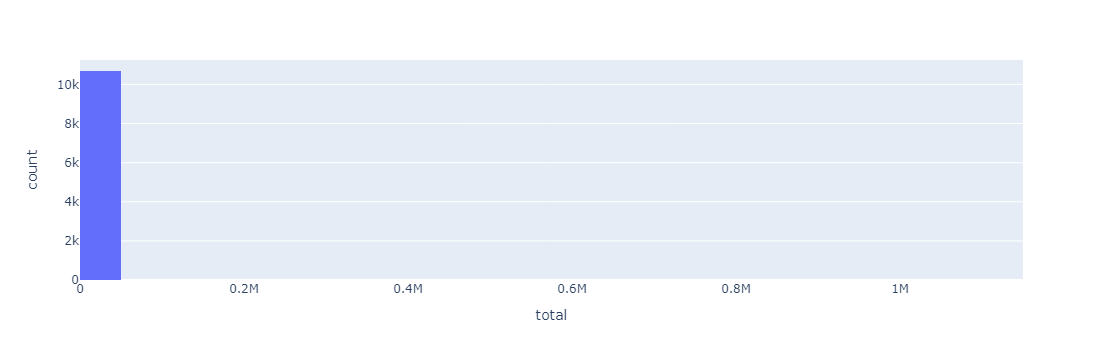

In [38]:
hist = px.histogram(casas_df, x='total', nbins=50)
hist.show()

11 - Utilizando o dataset principal (primeiro dataframe que você criou, não o casas_rj_bh), crie um boxplot para avaliarmos nossas métricas estatísticas.

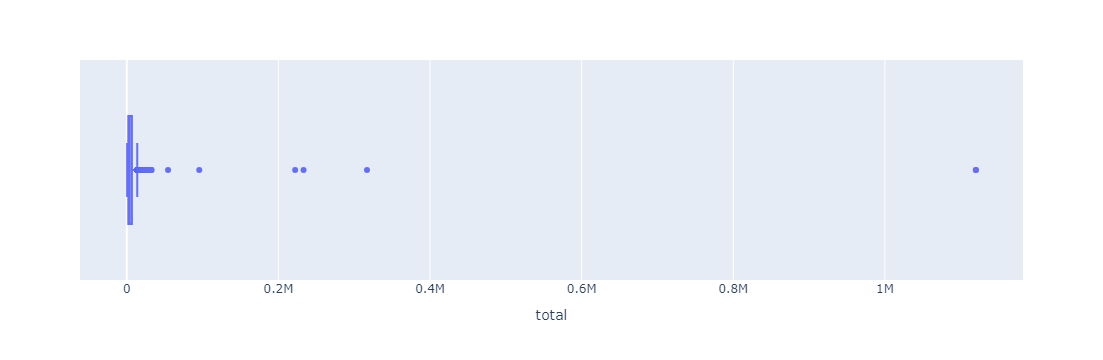

In [39]:
box = px.box(casas_df, x='total')
box.show()

12 - Existem candidados a outliers nesse dataset analisando a variável total? Explique

R: ***Sim, há um grande outlier (1.2M) e alguns outros outliers entre os ranges 90k - 320k***

13 - Crie o limite inferior e superior utilizando a técnica do intervalo interquatil, tendo como base a variável total.

In [49]:
q1 = casas_df['total'].quantile(0.25)
q3 = casas_df['total'].quantile(0.75)
IQR = q3 - q1

limite_superior = q1 + 1.5 * IQR
limite_inferior = q3 - 1.5 * IQR


14 - Crie um novo dataset chamado df_sem_outliers utilizando realizando o filtro de limite inferior e limite superior.

In [50]:
df_sem_outliers = casas_df[(casas_df['total'] >= limite_inferior) & (casas_df['total'] <= limite_superior)].copy()
df_sem_outliers

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


15 - Utilizando o dataset sem outliers, crie um histograma com o agrupamento de 50 bins para avaliarmos a distribuição da nossa variável total.

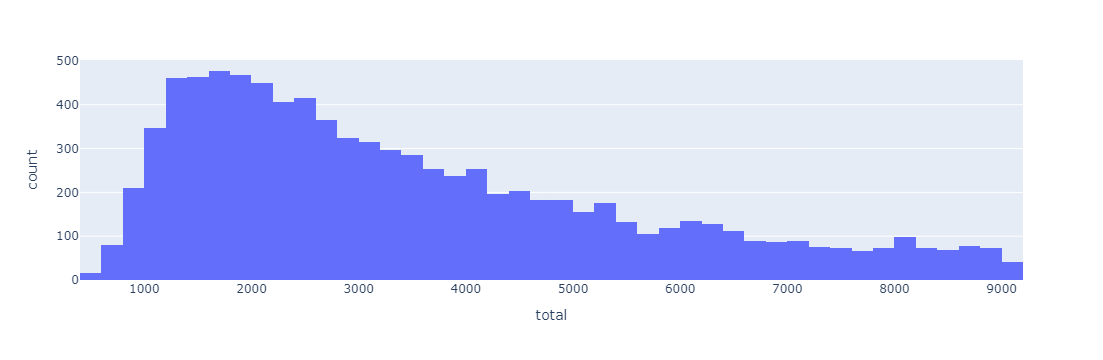

In [51]:
hist = px.histogram(df_sem_outliers, x='total', nbins=50)
hist.show()

16 - Utilizando o dataset sem outliers, crie um boxplot para avaliarmos nossas métricas estatísticas.

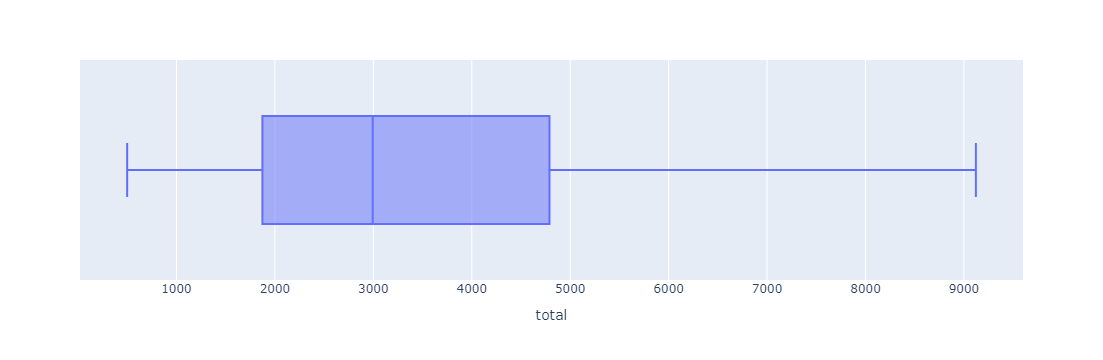

In [52]:
box = px.box(df_sem_outliers, x='total')
box.show()

## Medidas de Tendência Central - *(Peso: 3)*

17 - Faça um análise de antes e depois com a função que apresenta o std(desvio padrão), média, mediana, q1, q2, q3, min e max do dataset com outliers e sem outliers.

In [56]:
casas_df.describe()

,area,rooms,bathroom,parking_spaces,hoa,rent_amount,property_tax,fire_insurance,total
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


In [57]:
df_sem_outliers.describe()

,area,rooms,bathroom,parking_spaces,hoa,rent_amount,property_tax,fire_insurance,total
count,8933.00,8933.00,8933.00,8933.00,8933.00,8933.00,8933.00,8933.00,8933.00
mean,109.85,2.29,1.88,1.28,653.64,2670.84,181.05,36.65,3542.33
std,164.07,1.07,1.11,1.32,655.26,1634.98,261.07,23.69,2085.37
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,50.00,1.00,1.00,0.00,170.00,1400.00,27.00,19.00,1873.00
50%,77.00,2.00,2.00,1.00,500.00,2200.00,93.00,30.00,2994.00
75%,130.00,3.00,2.00,2.00,921.00,3500.00,234.00,48.00,4789.00
max,12732.00,10.00,10.00,10.00,4900.00,8820.00,3000.00,152.00,9121.00


18 - Com o dataset que você considera o melhor para avaliar as medidas de tendência central, apresente:

Média:

In [59]:
df_sem_outliers['total'].mean()

3542.3256464793462

Mediana:

In [60]:
df_sem_outliers['total'].median()

2994.0

Moda

In [61]:
df_sem_outliers['total'].mode()

0    2555
Name: total, dtype: int64

19 - Justifique a escolha do dataset para apresentar as medidas de tendência central.

R: ***Há mais precisão nas análises e os dados são mais realistas (sem extremos); as médias não serão destorcidas, o max e min (possivelmente) completamente mudam, entre outras tragédias***